# HEADLINE ANALYSIS
## 13 MILLION NEW YORK TIMES ARTICLE TITLES!
### (_from 1882-2016_)

## Overview and Motivation

Every day we're greeted with new stories in the news, but how have the headlines themselves changed over time? We set out to uncover trends in the way that headlines are written; to better understand the effects of war, technology and (....) on our news. We wanted to find interesting trends in the headlines over the time, and see what factors might be responsible for the variations. 

## Related Work

The idea of finding trends in headlines was our real inspirtation. We found no such analysis done before, on a large dataset containing close to 13 million articles.This inspired us to use our knowledge from the class and apply it to find some interesting facts about headlines over time.

## Initial Questions

Some of the initial questions that we asked are: Are the headlines become harder or easier to read? In what time period do the headlines have the most question marks? In what time period are the headlines changing from all Caps to lowercase ? Are the people in the 2nd industrial revolution affecting the readability score (becoming higher) or is there any relation?

## Exploratory Data Analysis

We used various visualizations to represent our findings. These include line graphs, scatter plots and a color map feature. The plots were useful to visualize the answers to our questions. We used the New York Times API to collect headlines from news articles, of which we collected around 13 million in total. The analyzed articles range from 1882 to 2016. The very large nature of our dataset required the Team to extract and transform our data in a manner which could be easily loaded once stored. The voluminous size could was often a burden during analysis, and required significant computation time. Lastly, we kept our visuals simple, so it is easier for someone to understand the analysis.

### First, load the three csv files

In [18]:
import csv, nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, NumeralTickFormatter
output_notebook()

Loading BokehJS ...

In [10]:
csv_1 = '/shared/code/csce489-ds/project/work/nyt_data_1_clean.csv'
%time nyt_1 = pd.read_csv(csv_1, \
                             skipinitialspace=True, \
                             skiprows = True, \
                             index_col=[1], \
                             names=['headlines'],\
                             parse_dates=True).dropna()

CPU times: user 8.77 s, sys: 300 ms, total: 9.07 s
Wall time: 9.07 s


In [11]:
csv_2 = '/shared/code/csce489-ds/project/work/nyt_data_2_clean.csv'
%time nyt_2 = pd.read_csv(csv_2, \
                             skipinitialspace=True, \
                             skiprows = True, \
                             index_col=[0], \
                             names=['headlines'],\
                             parse_dates=True).dropna()

CPU times: user 10.9 s, sys: 400 ms, total: 11.3 s
Wall time: 11.3 s


In [12]:
csv_3 = '/shared/code/csce489-ds/project/work/nyt_data_3_clean.csv'
%time nyt_3 = pd.read_csv(csv_3, \
                             skipinitialspace=True, \
                             skiprows = True, \
                             index_col=[0], \
                             names=['headlines'],\
                             parse_dates=True).dropna()

CPU times: user 644 ms, sys: 20 ms, total: 664 ms
Wall time: 660 ms


### Now sort the indexes in the DF:

In [13]:
nyt_1.sort_index()
nyt_2.sort_index()
nyt_3.sort_index()
print 

### Now append the DataFrames together:

In [14]:
nyt_df = nyt_1.append(nyt_2)
nyt_df = nyt_df.append(nyt_3)

### Check that they appended correctly:

In [15]:
nyt_df.sort_index()
nyt_df.reindex()

print nyt_df.index.min()
print nyt_df.index.max()
print "length: ", len(nyt_df)

1882-01-01 00:00:00
2016-12-05 00:00:00
length:  13431574


### Now we can do cool things like search by Datetimeindex!!

In [10]:
# Search for the first 5 from 1903
nyt_df['1903'].head()

,headlines
1903-01-01,WISH TO THREATEN CHINA.; Ministers Propose to ...
1903-01-01,TO MAKE TRANSIT PLANS REGARDLESS OF EXPENSE; C...
1903-01-01,CLERMONT SKATING RACES; Two Hotly Contested Ev...
1903-01-01,IN HONOR OF MASCAGNI.; Arrangements in Chicago...
1903-01-01,THE UNITED SERVICE.; Army.


In [11]:
# Search for the first 5 from March 1945 
nyt_df['1945-03'].head()

,headlines
1945-03-02,Americans See Germans Kill U.S. Colonel As He ...
1945-03-02,WRECK OF THE 'SPIRIT OF ST. LOUIS' IN OHIO
1945-03-02,MEXICO AND SAN FRANCISCO
1945-03-02,March Arrives Like Lamb Bringing a High of 50
1945-03-02,TANKS ENTER TRIER AFTER TRICKING FOE; AS THE A...


In [12]:
# Search for the first 10 from the day after JFK was assasinated on November 22, 1963
nyt_df['1963-11-23'].head()

,headlines
1963-11-23,People Across U.S. Voice Grief and Revulsion M...
1963-11-23,LEFTIST ACCUSED
1963-11-23,Gov. Connally Shot; Mrs. Kennedy Safe Riding B...
1963-11-23,Why America Weeps
1963-11-23,Tributes Cite Loss to U. S. and World


## Let's Start Analysis!!:

In [18]:
# Function to count how many times an instance occurs per year
def count_occurences(df, dictionary):
    for entry in df.index:
        try:
            dictionary[int(entry.year)] = dictionary[int(entry.year)] + 1
        except ValueError:
            continue    # bad value, skip
    return dictionary

## QUESTION: How many times does the new york times mention itself in its headlines?

In [20]:
# Get the number of times NYT or New York Times is mentioned
not_contains = lambda S: 'to the new york times' not in S.lower()
nyt_mentioned = nyt_df[(nyt_df.headlines.apply(not_contains)) & ((nyt_df.headlines.str.contains('New York Times', case=False)) | (nyt_df.headlines.str.contains('nyt', case=False)))]

nyt_mentioned.head()

,headlines
1960-01-30,ALGIERS CIVILIANS EXPECT 'ANYTHING'; Stock Up ...
1960-02-07,SYMINGTON ASKS ACTION; Sees No Reason for U.S....
1960-02-13,Richard Ampeir 44 Press Aide Of Governor Rocke...
1960-02-14,A BOY'S WORLD THAT IS ANYTHING BUT 'COOL'
1960-02-24,LOUGHRAN DENIAL IS HEARD BY JURY; On Witness S...


In [21]:
# Generate a dictionary to hold the occurences per year and then load
yrs_nyt_mentioned = {key:0 for key in range(1882, 2017)}
for entry in nyt_mentioned.index:
    try:
        yrs_nyt_mentioned[int(entry.year)] = yrs_nyt_mentioned[int(entry.year)] + 1
    except ValueError:
        continue    # bad value, skip

yrs_nyt_mentioned = count_occurences(nyt_mentioned, yrs_nyt_mentioned)

In [1]:
# Plot using bokeh
# x = list(yrs_nyt_mentioned.keys())
# y = list(yrs_nyt_mentioned.values())


# p = figure(plot_width=900, plot_height=450)
# p.line(x, y, line_width=3)

# p.title.text='NYT Mentions itself in Article Title'
# p.title.text_font='helvetica'

# p.xgrid.grid_line_color = None
# p.ygrid.grid_line_alpha = 0.9
# p.ygrid.grid_line_dash = [6, 4]

# p.xaxis.axis_label = "Year"
# p.yaxis.axis_label = "Number"

# show(p)

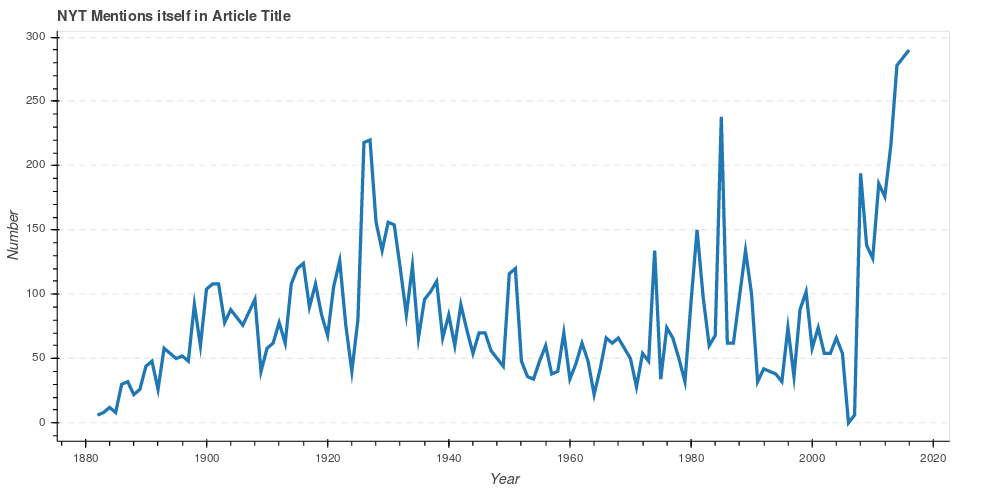

In [7]:
from IPython.display import Image
Image("./images/nyt-mentions-itself.png")

- ## This depicts a recent, significant increase in the paper mentioning itself! 

## Now let's look at headlines with all capital letters

In [16]:
# get all-caps headlines:
contains_caps = lambda r: np.any([w.isupper() for w in r.split(' ')])
selected_rows = nyt_df.loc[nyt_df['headlines'].apply(contains_caps)]
# print(selected_rows.shape)
selected_rows.head()

,headlines
1960-01-01,SOVIET EDITOR CITES MARK TWAIN ARTICLE
1960-01-01,PRIEST IS ACCUSED IN FUND SHORTAGE
1960-01-01,BIG GAINS POSTED BY WESTERN UNION
1960-01-01,U.S. STORE TRADE UP 20% LAST WEEK; Sharp Rise ...
1960-01-01,$99306 FINE IS SET FOR EX-LAWMAKER


In [19]:
yrs_all_caps = {key:0 for key in range(1882, 2017)}
yrs_all_caps = count_occurences(selected_rows, yrs_all_caps)

In [21]:
# yrs_all_caps
# Plot using bokeh
x = list(yrs_all_caps.keys())
y = list(yrs_all_caps.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Number of Articles Containing All-Capital Lettered Words'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

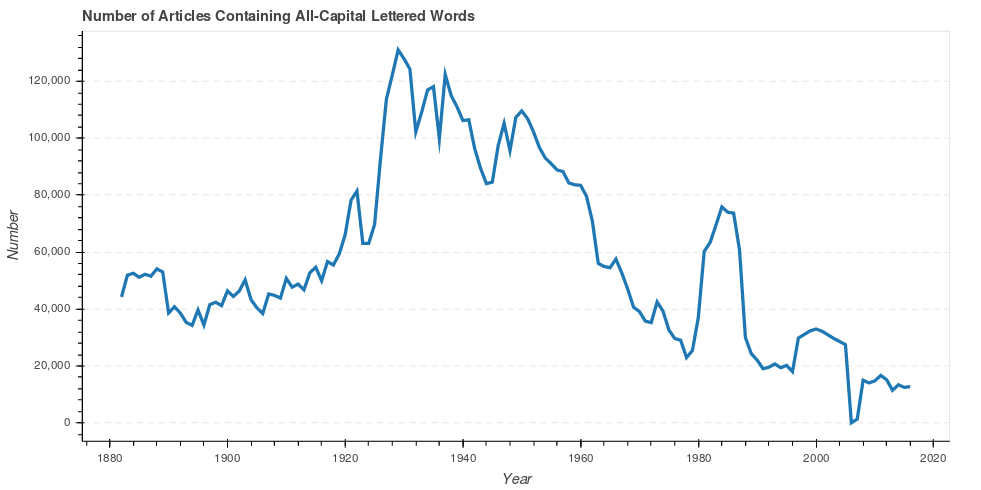

In [8]:
from IPython.display import Image
Image("./images/all-caps-headlines.png")

- # Wait, wasn't something happening during this spike?

In [23]:
# yrs_all_caps
# Plot using bokeh
x = list(yrs_all_caps.keys())
y = list(yrs_all_caps.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Number of Articles Containing All-Capital Lettered Words'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.patch([1939, 1939, 1945,1945], [0,130000,130000,0], alpha=0.1, line_width=2)

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

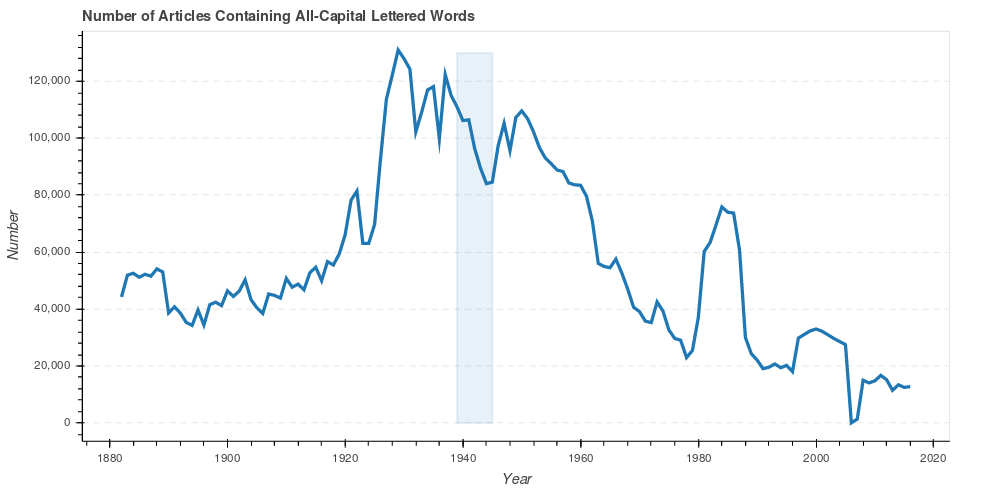

In [24]:
from IPython.display import Image
Image("./images/all-caps-headlines-withWWII-shading.png")

- ## Looks like a swift rise in capital headlines after World War II?...

### Now find what percentage of each year's headlines were all caps!
#### This one takes FOREVER to compute... DON'T RUN THIS, THE DATA WAS WRITTEN TO CSV, NO NEED TO RERUN! DON'T DO IT!

In [95]:
from collections import defaultdict
# Uncomment to re-run, it will take approx 20-30 mins
# # Calculate the percentage of capitol words for each entry
# all_cap_percent = defaultdict(list) 
# # Get each entry with caps
# for index, headline in selected_rows.iterrows():
#     cap_words = 0.0
#     # split the entry by space
#     words = headline[0].split()
#     # iterate through the word list and find 
#     for word in words:
#         if word.isupper():
#             cap_words = cap_words + 1
#     all_cap_percent[index.year].append(cap_words/len(words) * 100)

In [101]:
# # Average the capitol percentage values
# for entry, values in all_cap_percent.iteritems():
#     all_cap_percent[entry] = sum(values)/len(values)
# all_cap_percent.items()

In [103]:
# That took a while, let's write the results to a csv file so we don't have to compute it again
# out_file = '/shared/code/csce489-ds/project/work/percent_capital.csv'
# with open(out_file, 'wb') as f:
#     w = csv.writer(f)
#     w.writerows(all_cap_percent.items())

In [27]:
# Read in the CSV date from previous calculation, Uncomment previous if re-running calc
in_file = '/shared/code/csce489-ds/project/repo-correct/489-project/data/percent_capital.csv'
with open(in_file, 'r') as f:
    read = csv.reader(f)
    perc_cap = {int(rows[0]):float(rows[1]) for rows in read}

In [30]:
x = list(perc_cap.keys())
y = list(perc_cap.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Percentage of Articles with Entire Title Capitalized'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

# p.patch([1939, 1939, 1945,1945], [0,130000,130000,0], alpha=0.1, line_width=2)

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Percent"
# p.yaxis[0].formatter = NumeralTickFormatter(format="%")

show(p)

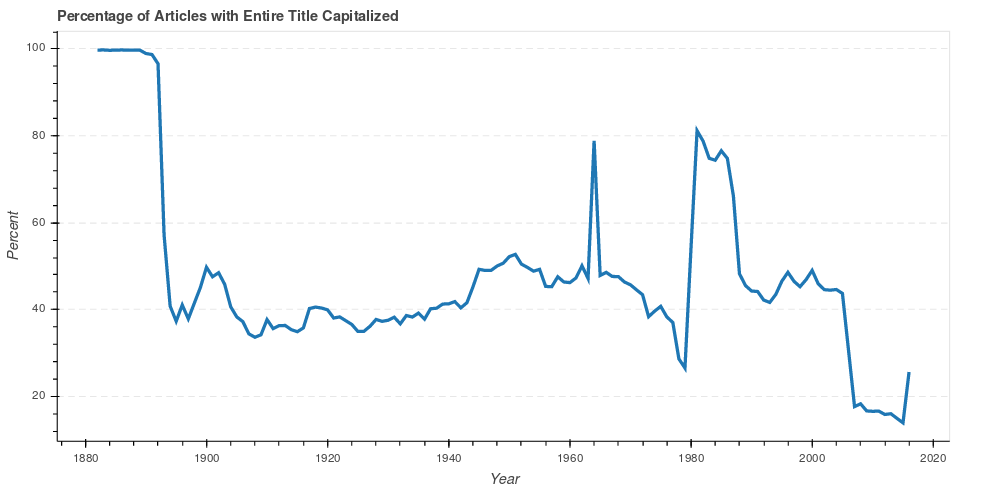

In [29]:
from IPython.display import Image
Image("./images/percent-all-caps.png")

- ## It is very interesting to see that all headlines in the 1880's were all-caps! Why the recent trend for this style again?

# How Have Headlines with ?'s Changed?

In [15]:
# get all headlines containing a question mark:
quest_rows = nyt_df.loc[nyt_df['headlines'].str.contains('\?$')]
print(quest_rows.shape)
quest_rows.head()

(80982, 1)


,headlines
1960-01-03,Teachers Doing Home's Work?
1960-01-04,Return to Reason?
1960-01-08,When Trout Fishermen Start Tying Flies Can Spr...
1960-01-10,The Issues: Peace Prosperity or -- ?; The main...
1960-01-10,ONCE AGAIN GRANDEUR FOR LA PATRIE?; De Gaulle ...


In [16]:
# Extract the values for each year into a dictionary
yrs_quest = {key:0 for key in range(1882, 2017)}
yrs_quest = count_occurences(quest_rows, yrs_quest)

## Now Let's Plot the Number of Headlines with ?'s 

In [4]:
# Plot using bokeh
x = list(yrs_quest.keys())
y = list(yrs_quest.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Number of Articles Containing Question Marks?'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Number"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

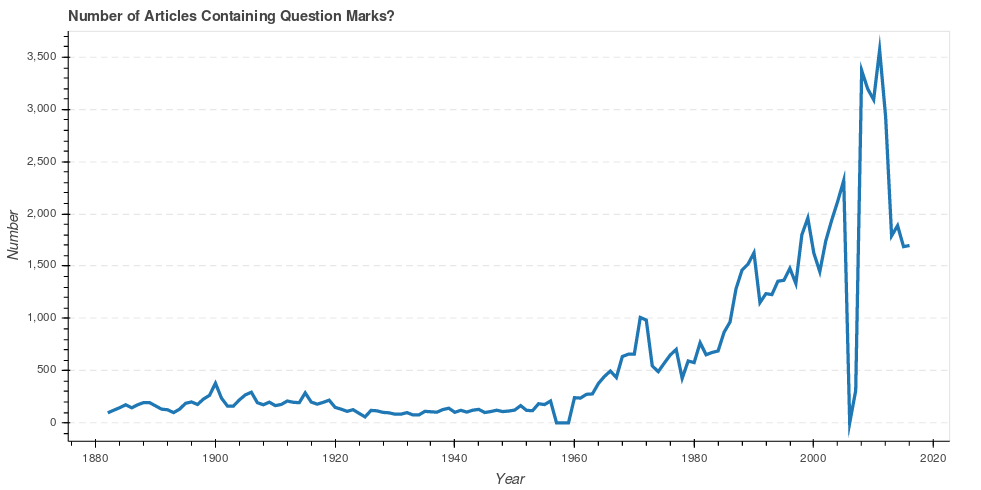

In [31]:
from IPython.display import Image
Image("./images/question-marks.png")

## It appears that there is an upwards trend in the average number of headlines with question marks!

# Are Americans getting Smarter?

Americans are [becoming better educated](https://en.wikipedia.org/wiki/Educational_attainment_in_the_United_States). This made us curious, have headlines increased in reading difficulty? To find out we ran several analyses to determine the trend.

## Calculate Flesch-Kincaid Readability Score
- The [Flesch Readability Test](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests) examines text using a formula which considers the ratio of total words to total sentences, and a ratio of total syllables to total words. 
- The scores are then ranked by the average grade level of a student who would be capable of understanding the text.

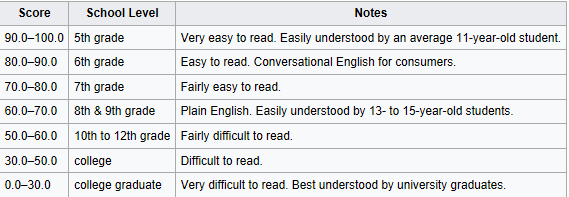

In [5]:
#From wipedia : https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests
from IPython.display import Image
Image("read.png")

In [77]:
# Flesch Reading ease -- Takes an enormous amount of time to run, uncomment if you dare...

# from collections import defaultdict
# from textstat.textstat import textstat
# count = 0
# dictionary = defaultdict(list)
# for index, headline in nyt_df.iterrows():
#     # print date #this is the title heading of each data point
#     count = count + 1
# #     if count > 1000000: #use this to generate plot for intial 1000 or 5000 data points
# #         break
#     date = index.year
#     try:
#         if len(headline[0]) > 0:
#             dictionary[date].append(textstat.flesch_reading_ease(headline[0])) #appending all redability value for the same exisiting date
#     except:
#         continue

In [7]:
# Tabulate the averages by year
for entry, values in dictionary.iteritems():
    dictionary[entry] = sum(values)/len(values)

In [76]:
# That took a while, let's write the results to a csv file so we don't have to compute it again
# out_file = './data/flesch_score.csv'
# with open(out_file, 'wb') as f:
#     w = csv.writer(f)
#     w.writerows(dictionary.items())

In [12]:
# Read in the CSV date from previous calculation, Uncomment previous if re-running calc
in_file = './data/flesch_score.csv'
with open(in_file, 'r') as f:
    read = csv.reader(f)
    readability_score = {int(rows[0]):float(rows[1]) for rows in read}

In [3]:
# Plot using bokeh
x = list(readability_score.keys())
y = list(readability_score.values())

p = figure(plot_width=900, plot_height=450)
p.line(x, y, line_width=3)

p.title.text='Flesch Reading Ease per Year'
p.title.text_font='helvetica'

p.xgrid.grid_line_color = None
p.ygrid.grid_line_alpha = 0.9
p.ygrid.grid_line_dash = [6, 4]

p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Score"
p.yaxis[0].formatter = NumeralTickFormatter(format="0,0")

show(p)

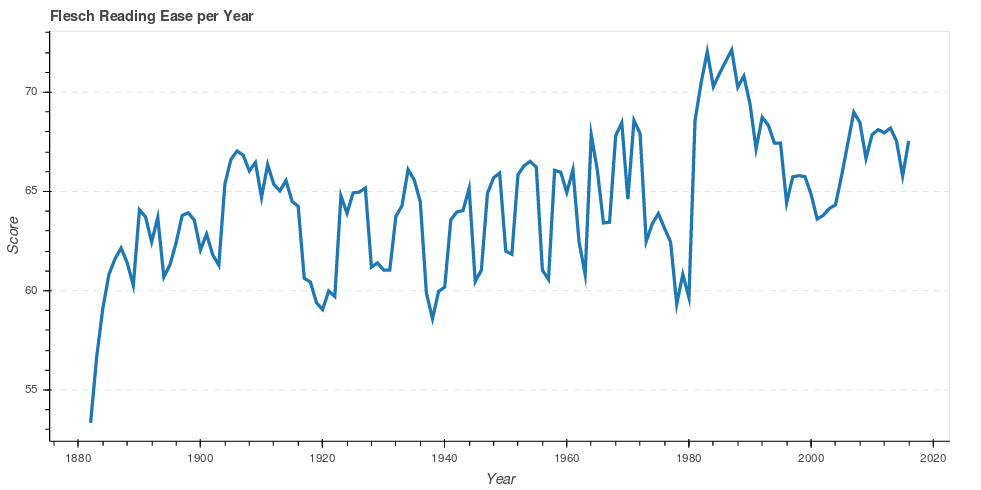

In [26]:
from IPython.display import Image
Image("./images/flesch-reading.png")

What! We assumed that because Americans are more educated that headline reading difficulty would also increase, and therefore become more difficult to read! However, the data shows that average readability has in fact steadily decreased since the late 1800's! 

## Grade Level over Time

Next, we examined the [Dale-Chall readability score](https://en.wikipedia.org/wiki/Dale%E2%80%93Chall_readability_formula), which is similar to the Flesch-Kincaid test, with a slightly different scoring mechanism.

In [15]:
# Calculate the scores - This takes significant time, 
# and was not completed of the entire dataset
count = 0
dictionary = defaultdict(list)
for index, headline in nyt_main.iterrows():
    # print date #this is the title heading of each data point
    count = count + 1
    if count > 300000: #use this to generate plot for intial 1000 or 5000 data points 
        break
    date = index.year
    try:
        dictionary[date].append(textstat.dale_chall_readability_score(headline[0])) #appending all redability value for the same exisiting date
    except:
        continue

In [11]:
# Tabulate the scores
for entry, values in dictionary.iteritems():
        dictionary[entry] = sum(values)/len(values)

In [13]:
x = list(dictionary.keys())
y = list(dictionary.values())
print x, y
fig,ax = plt.subplots()
plt.scatter(x,y) #plotting
plt.plot(x,y)
plt.xticks(x, x, rotation=70) 
ax.set_xlabel('Time/Date')
ax.set_ylabel('dale chall readability school grade')
plt.title('dale chall readability school grade vs, Time')
plt.show() #displaying the plot

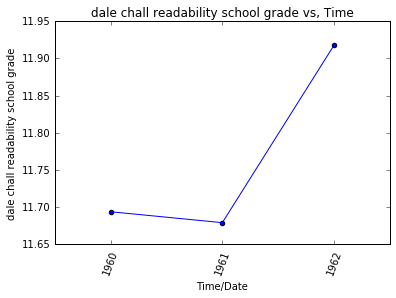

In [16]:
from IPython.display import Image
Image("dale-chall.png")

This analysis was performed on a rather small subsection of the dataset. However, it does appear that there is likely a trend towards an increase in readability. 

## The Long Depression

The Team also looked at an interesting period of time, The [Long Depression](https://en.wikipedia.org/wiki/Long_Depression).

In [ ]:
count = 0
dictionary = {} #dictionary which stores date as key and redability as value
with open('NYTimes_results_1990.csv', 'rb') as file: #opening the file
    reader = csv.reader(file) #using csv reader to read the csv
    reader.next() #ignoring the first row
    for row in reader:	#reading each row
        #print row[1] #1this is the title heading of each data point
	count = count + 1
        #if count > 3000: #use this to generate plot for intial 1000 or 5000 data points
            #break
        if row[2] in dictionary:
            dictionary[row[2]].append(textstat.flesch_reading_ease(row[1])) #appending all redability value for the same exisiting date
        else:
            dictionary[row[2]] = [textstat.flesch_reading_ease(row[1])] #creating the initial redability value for a date

for i in range(len(dictionary)):
    dictionary[dictionary.keys()[i]] = int(sum(dictionary.values()[i])/len(dictionary.values()[i])) #averaging the redability values


x = dictionary.keys()
y = dictionary.values()
z = dictionary.values()
cm = plt.cm.get_cmap('jet')
fig,ax = plt.subplots()
plot = ax.scatter(range(len(x)),y, c = z , cmap = cm , linewidth = 0, alpha = 0.5)
fig.colorbar(plot)
ax.set_xticklabels([])
#plt.xticks(range(len(x)), x, rotation=70) 
plt.show()

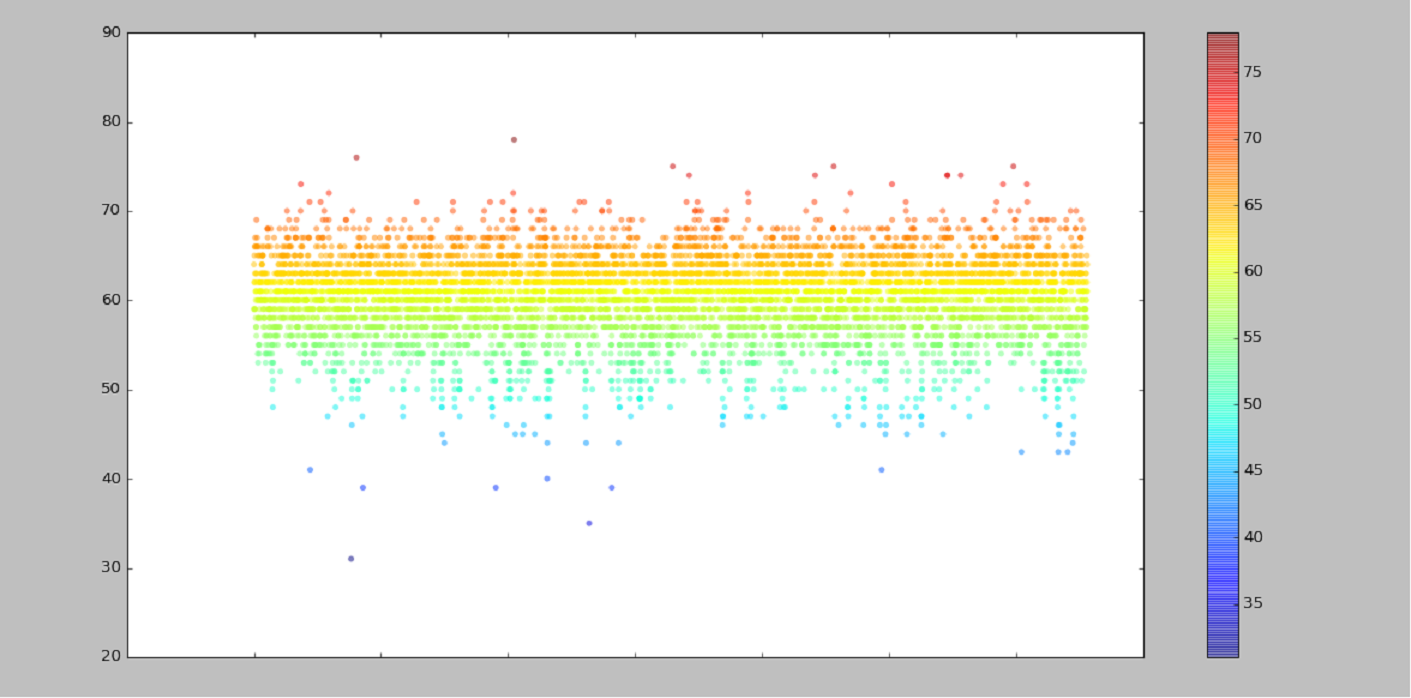

In [17]:
from IPython.display import Image
Image("long-depr.png")

This represents each article's Flesch-Kincaid Readability during the a period of economic recession known as the Long Depression. The graph shows that even during the Long Depression, the article titles were more difficult to read than present day!

# Conclusion

- The most drastic result is that headlines are now significantly more likely to include a question. Perhaps this means that writers are trying harder to catch a possible reader's attention. This is not an unlikely possibility, as competition for readers during the digital-era is very high. 

- The last interesting result of our analysis is the ALL-CAPS usage for headlines in the 1880's! The team first noticed the presence of all-caps headlines while exploring the data. It is interesting to see the trend away from using all-capital headlines in the late 1800's and their resurgence in the 1980's. Perhaps the 1800's trend was derived from a lack of printing technology; as a way to create a greater variance between the article text and headline text on a page.

We conclude that the structure of headlines has changed drastically over the time period. Our study focuses on the textual behavior of these headlines, and from the results shown above it is quite evident, that the newspaper headlines have shown changes over time.